In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc 


In [2]:
# # path to  data 
data_path = "/home/t/tandrew6/btchatch/.$SCRATCH/spatial/mouse_kidney_HD/binned_outputs"
os.listdir(data_path)

['square_008um', '.DS_Store', 'square_016um', 'square_002um']

In [23]:
# def convert_parquet_to_csv(input_dir):
#     for root, dirs, files in os.walk(input_dir):
#         for file in files:
#             if file.endswith(".parquet"):
#                 df = pd.read_parquet(os.path.join(root, file))
#                 df.to_csv(os.path.join(root, file.replace(".parquet", "_list.csv")), index=False, header=False)
#                 print(f"Converted {os.path.join(root, file)} to csv")
                
# convert_parquet_to_csv(data_path)

Converted /home/t/tandrew6/btchatch/.$SCRATCH/spatial/mouse_kidney_HD/binned_outputs/square_008um/spatial/tissue_positions.parquet to csv
Converted /home/t/tandrew6/btchatch/.$SCRATCH/spatial/mouse_kidney_HD/binned_outputs/square_016um/spatial/tissue_positions.parquet to csv
Converted /home/t/tandrew6/btchatch/.$SCRATCH/spatial/mouse_kidney_HD/binned_outputs/square_002um/spatial/tissue_positions.parquet to csv


In [3]:
# get the 16um bins 
adata = sc.read_visium(os.path.join(data_path, "square_008um"))
adata.var_names_make_unique()

/gpfs/fs1/home/t/tandrew6/btchatch/env/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/fs1/home/t/tandrew6/btchatch/env/spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata

AnnData object with n_obs × n_vars = 502009 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
sc.pp.calculate_qc_metrics(adata,   log1p=False, inplace=True)

In [7]:
adata

AnnData object with n_obs × n_vars = 502009 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'spatial'
    obsm: 'spatial'

/gpfs/fs1/home/t/tandrew6/btchatch/env/spatial/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


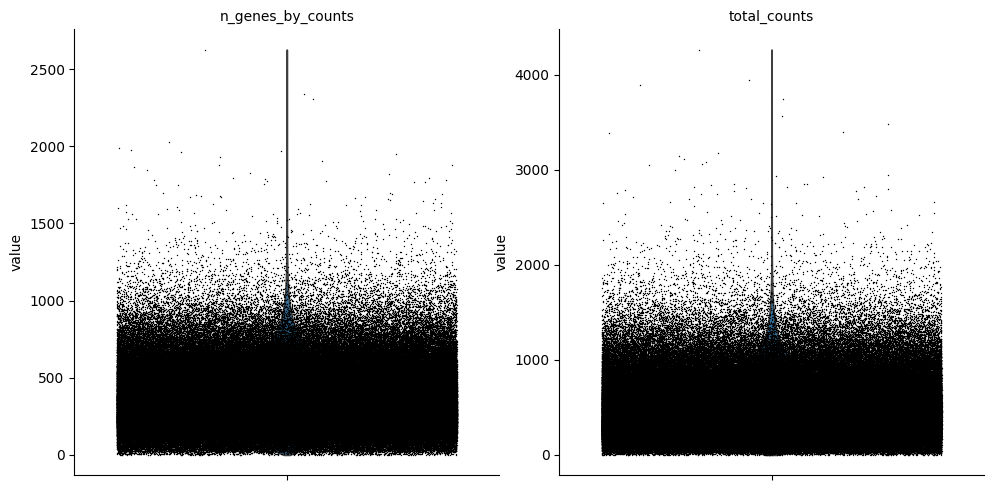

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

In [9]:
adata.obs["total_counts"].describe()

count    502009.000000
mean        466.736328
std         276.300323
min           0.000000
25%         269.000000
50%         405.000000
75%         603.000000
max        4264.000000
Name: total_counts, dtype: float64

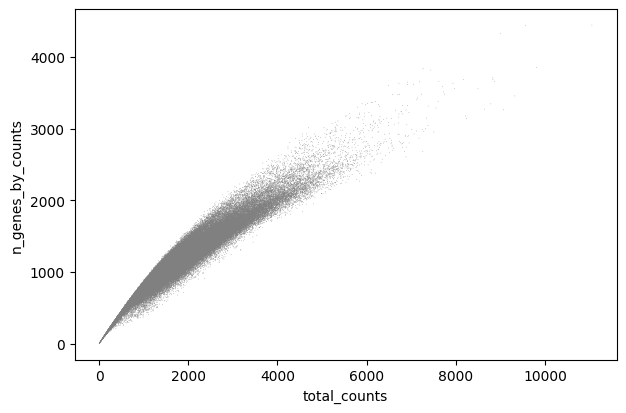

In [44]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [45]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)

In [46]:
sum(adata.var.highly_variable)

1354